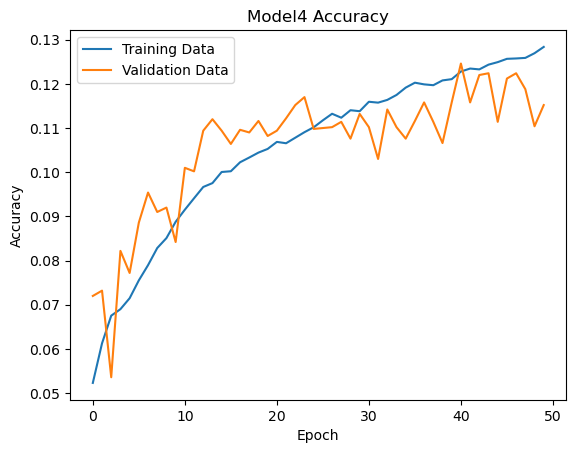

In [1]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pickle
history = pickle.load(open("Model4/history.p", "rb"))

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model4 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='upper left') 
plt.savefig('png/Model4 Accuracy.png')

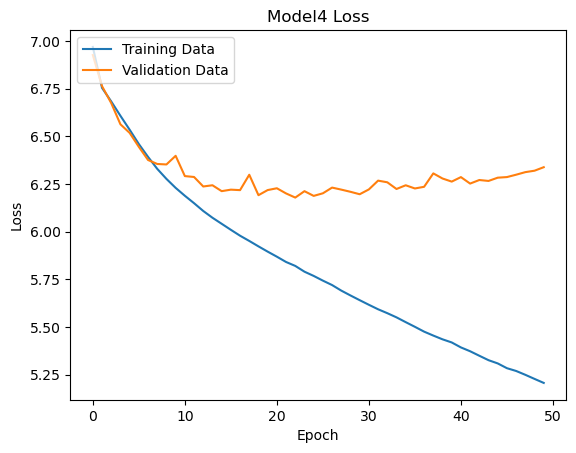

In [2]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model4 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='upper left') 
plt.savefig('png/Model4 Loss.png')

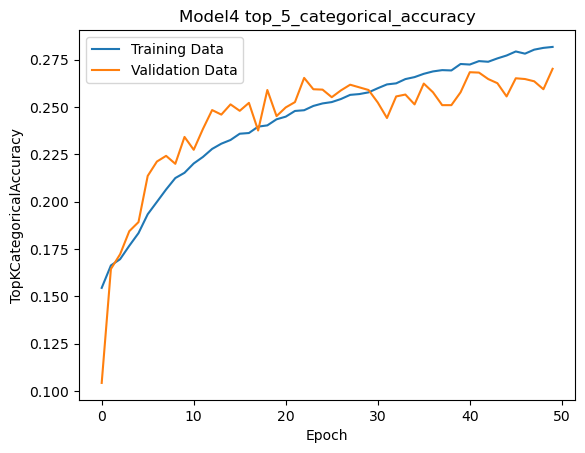

In [3]:
plt.plot(history['top_5_categorical_accuracy'])
plt.plot(history['val_top_5_categorical_accuracy'])
plt.title('Model4 top_5_categorical_accuracy')
plt.ylabel('TopKCategoricalAccuracy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='upper left') 
plt.savefig('png/Model4 top_5_categorical_accuracy k=5.png')

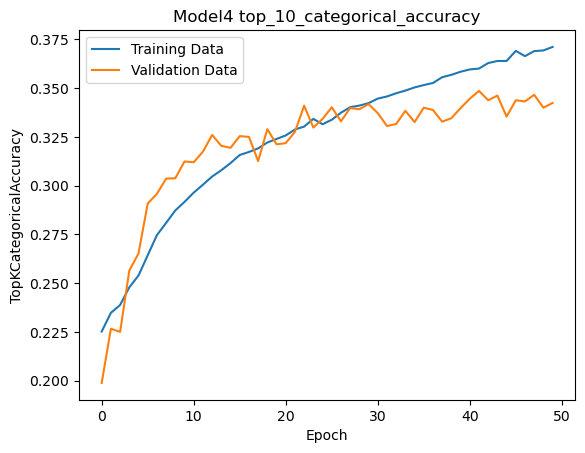

In [4]:
plt.plot(history['top_10_categorical_accuracy'])
plt.plot(history['val_top_10_categorical_accuracy'])
plt.title('Model4 top_10_categorical_accuracy')
plt.ylabel('TopKCategoricalAccuracy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='upper left') 
plt.savefig('png/Model4 top_10_categorical_accuracy k=5.png')

In [5]:
from tensorflow import keras
from tensorflow.keras.metrics import TopKCategoricalAccuracy
from sklearn.metrics import f1_score
import numpy as np

# Metrics
def top_5_categorical_accuracy(y_true, y_pred):
    return keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k=5)
def top_10_categorical_accuracy(y_true, y_pred):
    return keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k=10)
# Activation Functions
def elliott_activation(x):
    return (0.5 * x / (1 + tf.abs(x))) + 0.5
def modified_elliott_activation(x):
    return (x / tf.sqrt(1 + tf.square(x))) + 0.5
# Registriere die benutzerdefinierten Metrikfunktionen
custom_objects = {'top_5_categorical_accuracy': top_5_categorical_accuracy,
                  'top_10_categorical_accuracy': top_10_categorical_accuracy,
                 'elliott_activation': elliott_activation,
                 'modified_elliott_activation': modified_elliott_activation}

# Lade das Modell mit den registrierten benutzerdefinierten Metriken
with tf.keras.utils.custom_object_scope(custom_objects):
    model = keras.models.load_model('Model6/Model_100000.h5')

# model = keras.models.load_model('Model6/Model_100000.h5')

# Vorbereiten der Validierungsdaten
with open('FormatedData/100000/x_val.pickle', 'rb') as file:
    x_val = pickle.load(file)
with open('FormatedData/100000/y_val.pickle', 'rb') as file:
    y_val = pickle.load(file)

# Vorhersagen des Modells für die Validierungsdaten
predictions = model.predict(x_val)

# Genauigkeit (Accuracy)
accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(y_val, axis=1))
print("Accuracy:", accuracy)

# Perplexität (Perplexity)
perplexity = np.exp(np.mean(-np.log(predictions[np.arange(len(y_val)), np.argmax(y_val, axis=1)])))
print("Perplexity:", perplexity)

# Top-k Genauigkeit (Top-k Accuracy)
k = 5  # Anzahl der wahrscheinlichsten Vorhersagen
top_k_accuracy = TopKCategoricalAccuracy(k=k)
top_k_accuracy.update_state(y_val, predictions)
print("Top-", k, "Accuracy:", top_k_accuracy.result().numpy())

# Top-k Genauigkeit (Top-k Accuracy)
k = 10  # Anzahl der wahrscheinlichsten Vorhersagen
top_k_accuracy = TopKCategoricalAccuracy(k=k)
top_k_accuracy.update_state(y_val, predictions)
print("Top-", k, "Accuracy:", top_k_accuracy.result().numpy())

157/157 [==============================] - 12s 75ms/step
Accuracy: 0.0598
Perplexity: 1253.2175
Top- 5 Accuracy: 0.163
Top- 10 Accuracy: 0.2282


In [6]:
history2 = pickle.load(open("Model2/history.p", "rb"))
history3 = pickle.load(open("Model3/history.p", "rb"))
print("Model2:")
print("Last top_5_categorical_accuracy:",history2['top_k_categorical_accuracy'][49])
print("Last val top_5_categorical_accuracy:", history2['val_top_k_categorical_accuracy'][49])
print("Model3:")
print("Last top_5_categorical_accuracy:",history3['top_k_categorical_accuracy'][49])
print("Last val top_5_categorical_accuracy:", history3['val_top_k_categorical_accuracy'][49])

Model2:
Last top_5_categorical_accuracy: 0.401042103767395
Last val top_5_categorical_accuracy: 0.24580000340938568
Model3:
Last top_5_categorical_accuracy: 0.2766842246055603
Last val top_5_categorical_accuracy: 0.257999986410141


In [7]:
start_num = 4
end_num = 7

for num in range(start_num, end_num + 1):
    model = "Model" + str(num)
    history = pickle.load(open(model + "/history.p", "rb"))

    print(model + ":")
    print("Last accuracy:", history['accuracy'][49])
    print("Last val accuracy:", history['val_accuracy'][49])
    print("Last Loss:", history['loss'][49])
    print("Last val Loss:", history['val_loss'][49])
    print("Last top_5_categorical_accuracy:", history['top_5_categorical_accuracy'][49])
    print("Last val top_5_categorical_accuracy:", history['val_top_5_categorical_accuracy'][49])

Model4:
Last accuracy: 0.1283579021692276
Last val accuracy: 0.1151999980211258
Last Loss: 5.206809043884277
Last val Loss: 6.3379130363464355
Last top_5_categorical_accuracy: 0.28176841139793396
Last val top_5_categorical_accuracy: 0.2702000141143799
Model5:
Last accuracy: 0.1453789472579956
Last val accuracy: 0.11640000343322754
Last Loss: 5.222002029418945
Last val Loss: 6.335634708404541
Last top_5_categorical_accuracy: 0.30315789580345154
Last val top_5_categorical_accuracy: 0.2515999972820282
Model6:
Last accuracy: 0.05634737014770508
Last val accuracy: 0.06040000170469284
Last Loss: 7.041438579559326
Last val Loss: 7.131731986999512
Last top_5_categorical_accuracy: 0.15494737029075623
Last val top_5_categorical_accuracy: 0.16380000114440918
Model7:
Last accuracy: 0.08811578899621964
Last val accuracy: 0.10000000149011612
Last Loss: 6.079257965087891
Last val Loss: 6.320089817047119
Last top_5_categorical_accuracy: 0.21627368032932281
Last val top_5_categorical_accuracy: 0.243200